# Linear Regression

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Get the training data

In [5]:
dfx = pd.read_csv('../Datasets/Linear Regression/linearX.csv')
dfy = pd.read_csv('../Datasets/Linear Regression/linearY.csv')

In [6]:
x = dfx.values
y = dfy.values

print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


# Visualise and Preprocess

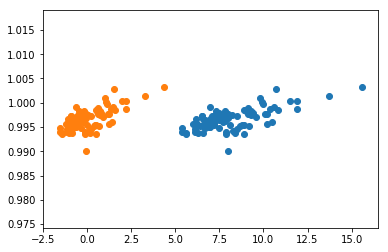

In [8]:
plt.scatter(x, y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X, Y)
plt.show()

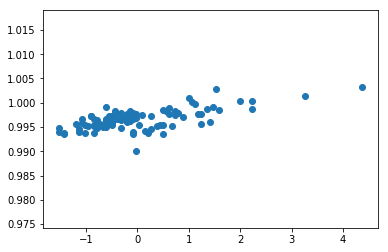

In [9]:
plt.scatter(X, Y)
plt.show()

## Gradient Descent Algorithm
- init with random theta
- Repeat until converge
    - Update theta accdg to the rule

In [100]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list

In [97]:
final_theta, error_list, theta_list = gradientDescent(X, Y)

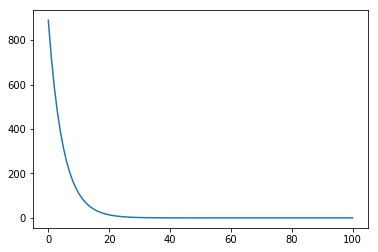

In [98]:
plt.plot(error_list)
plt.show()

In [99]:
print(final_theta)

[ 0.996554   0.0013579]


### Plot the line for testing data

In [101]:
xtest = np.linspace(-2, 6, 10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


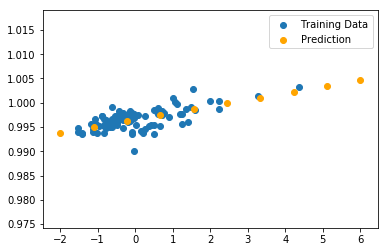

In [102]:
plt.scatter(X, Y, label='Training Data')
plt.scatter(xtest, hypothesis(xtest, final_theta), color='orange', label='Prediction')
plt.legend()
plt.show()


# Visualising Gradient Descent
 - Plotting Error Surfaces and Contours

In [103]:
T0 = np.arange(-2, 3, 0.01)
T1 = np.arange(-2, 3, 0.01)

T0, T1 = np.meshgrid(T0, T1) # a 2D surface of (T0, T1) along x and y - axis

J = np.zeros(T0.shape) # Corresponding value of J(T0, T1) along z - axis
 
m = T0.shape[0]
n = T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i, j] = np.sum((Y - T1[i, j]*X  - T0[i, j])**2)
#         J[i,j] = (1/2)*np.sum((T0[i,j]+T1[i,j]*X-Y)**2)
print(J.shape)

(500, 500)


In [104]:
theta_list = np.array(theta_list)

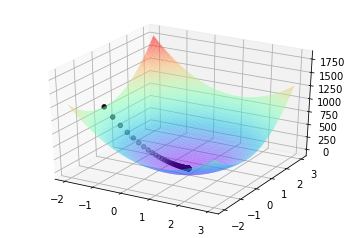

In [105]:
# Plot the 3D Loss

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.scatter(theta_list[:, 0], theta_list[:, 1], error_list, c='k')
axes.plot_surface(T0, T1, J, cmap='rainbow', alpha=0.5)
plt.show()

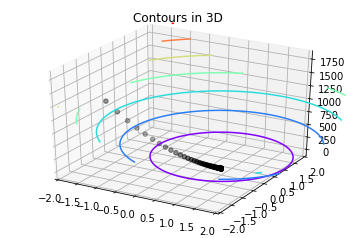

In [106]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.set_xlim([-2, 2])
axes.set_ylim([-2, 2])
axes.contour(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:, 0], theta_list[:, 1], error_list, c='k')
plt.title('Contours in 3D')
plt.show()

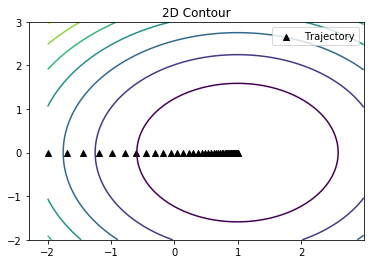

In [111]:
plt.contour(T0, T1, J)
plt.title("2D Contour")
plt.scatter(theta_list[:, 0], theta_list[:, 1], c='k', marker='^', label='Trajectory')
plt.legend()
plt.show()